<a href="https://colab.research.google.com/github/harini-projects/games_python/blob/main/intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST Data Classification Project

Step 1) Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Step 2) Load Data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Print the shape of data

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# show image

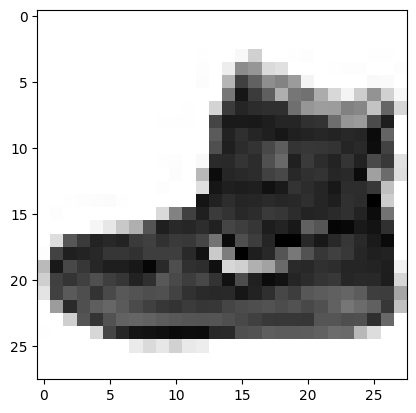

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

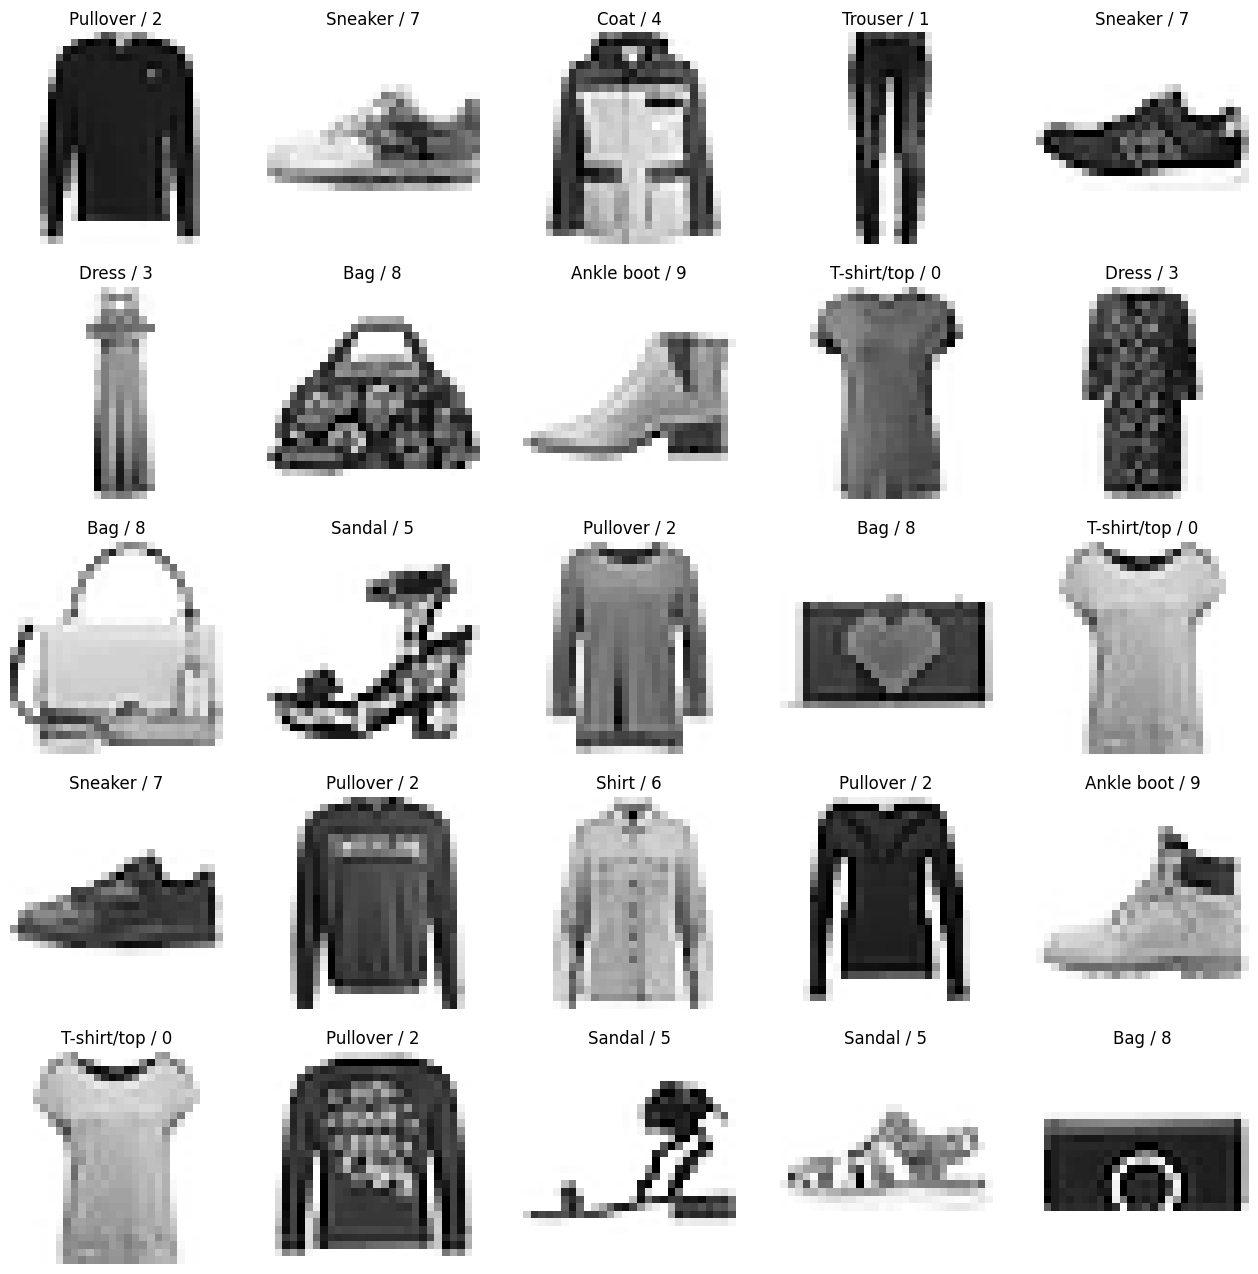

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim


4

In [ ]:
X_test=np.expand_dims(X_test,-1)

# feature scaling

In [ ]:
X_train = X_train/255
X_test= X_test/255

# Split dataset

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Step 3) Buiding the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 26s 256ms/step - loss: 0.6334 - accuracy: 0.7872 - val_loss: 0.4237 - val_accuracy: 0.8523
Epoch 2/10
94/94 [==============================] - 17s 183ms/step - loss: 0.3796 - accuracy: 0.8670 - val_loss: 0.3616 - val_accuracy: 0.8763
Epoch 3/10
94/94 [==============================] - 16s 166ms/step - loss: 0.3328 - accuracy: 0.8849 - val_loss: 0.3325 - val_accuracy: 0.8855
Epoch 4/10
94/94 [==============================] - 18s 196ms/step - loss: 0.3024 - accuracy: 0.8935 - val_loss: 0.3118 - val_accuracy: 0.8907
Epoch 5/10
94/94 [==============================] - 16s 165ms/step - loss: 0.2789 - accuracy: 0.9019 - val_loss: 0.3044 - val_accuracy: 0.8925
Epoch 6/10
94/94 [==============================] - 15s 162ms/step - loss: 0.2611 - accuracy: 0.9068 - val_loss: 0.2874 - val_accuracy: 0.8987
Epoch 7/10
94/94 [==============================] - 17s 185ms/step - loss: 0.2462 - accuracy: 0.9120 - val_loss: 0.2836 - val_accuracy: 0.9013

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.06, 0.  , 0.94],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.02, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2797 - accuracy: 0.9007


[0.27969714999198914, 0.9006999731063843]

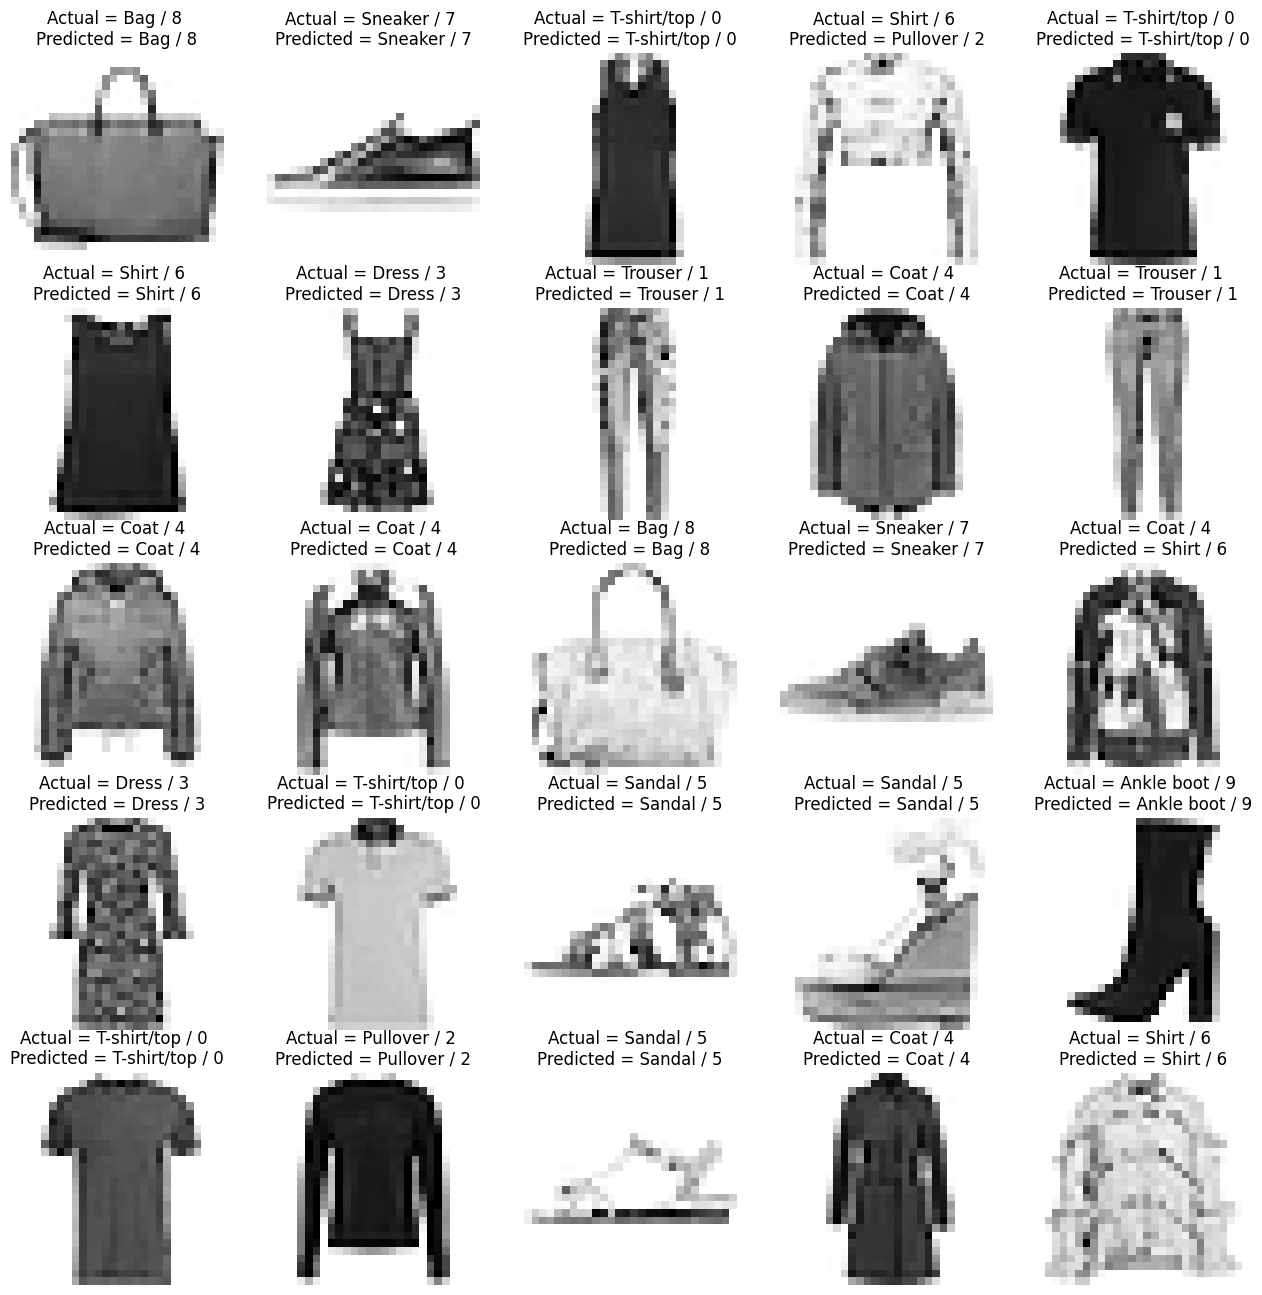

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

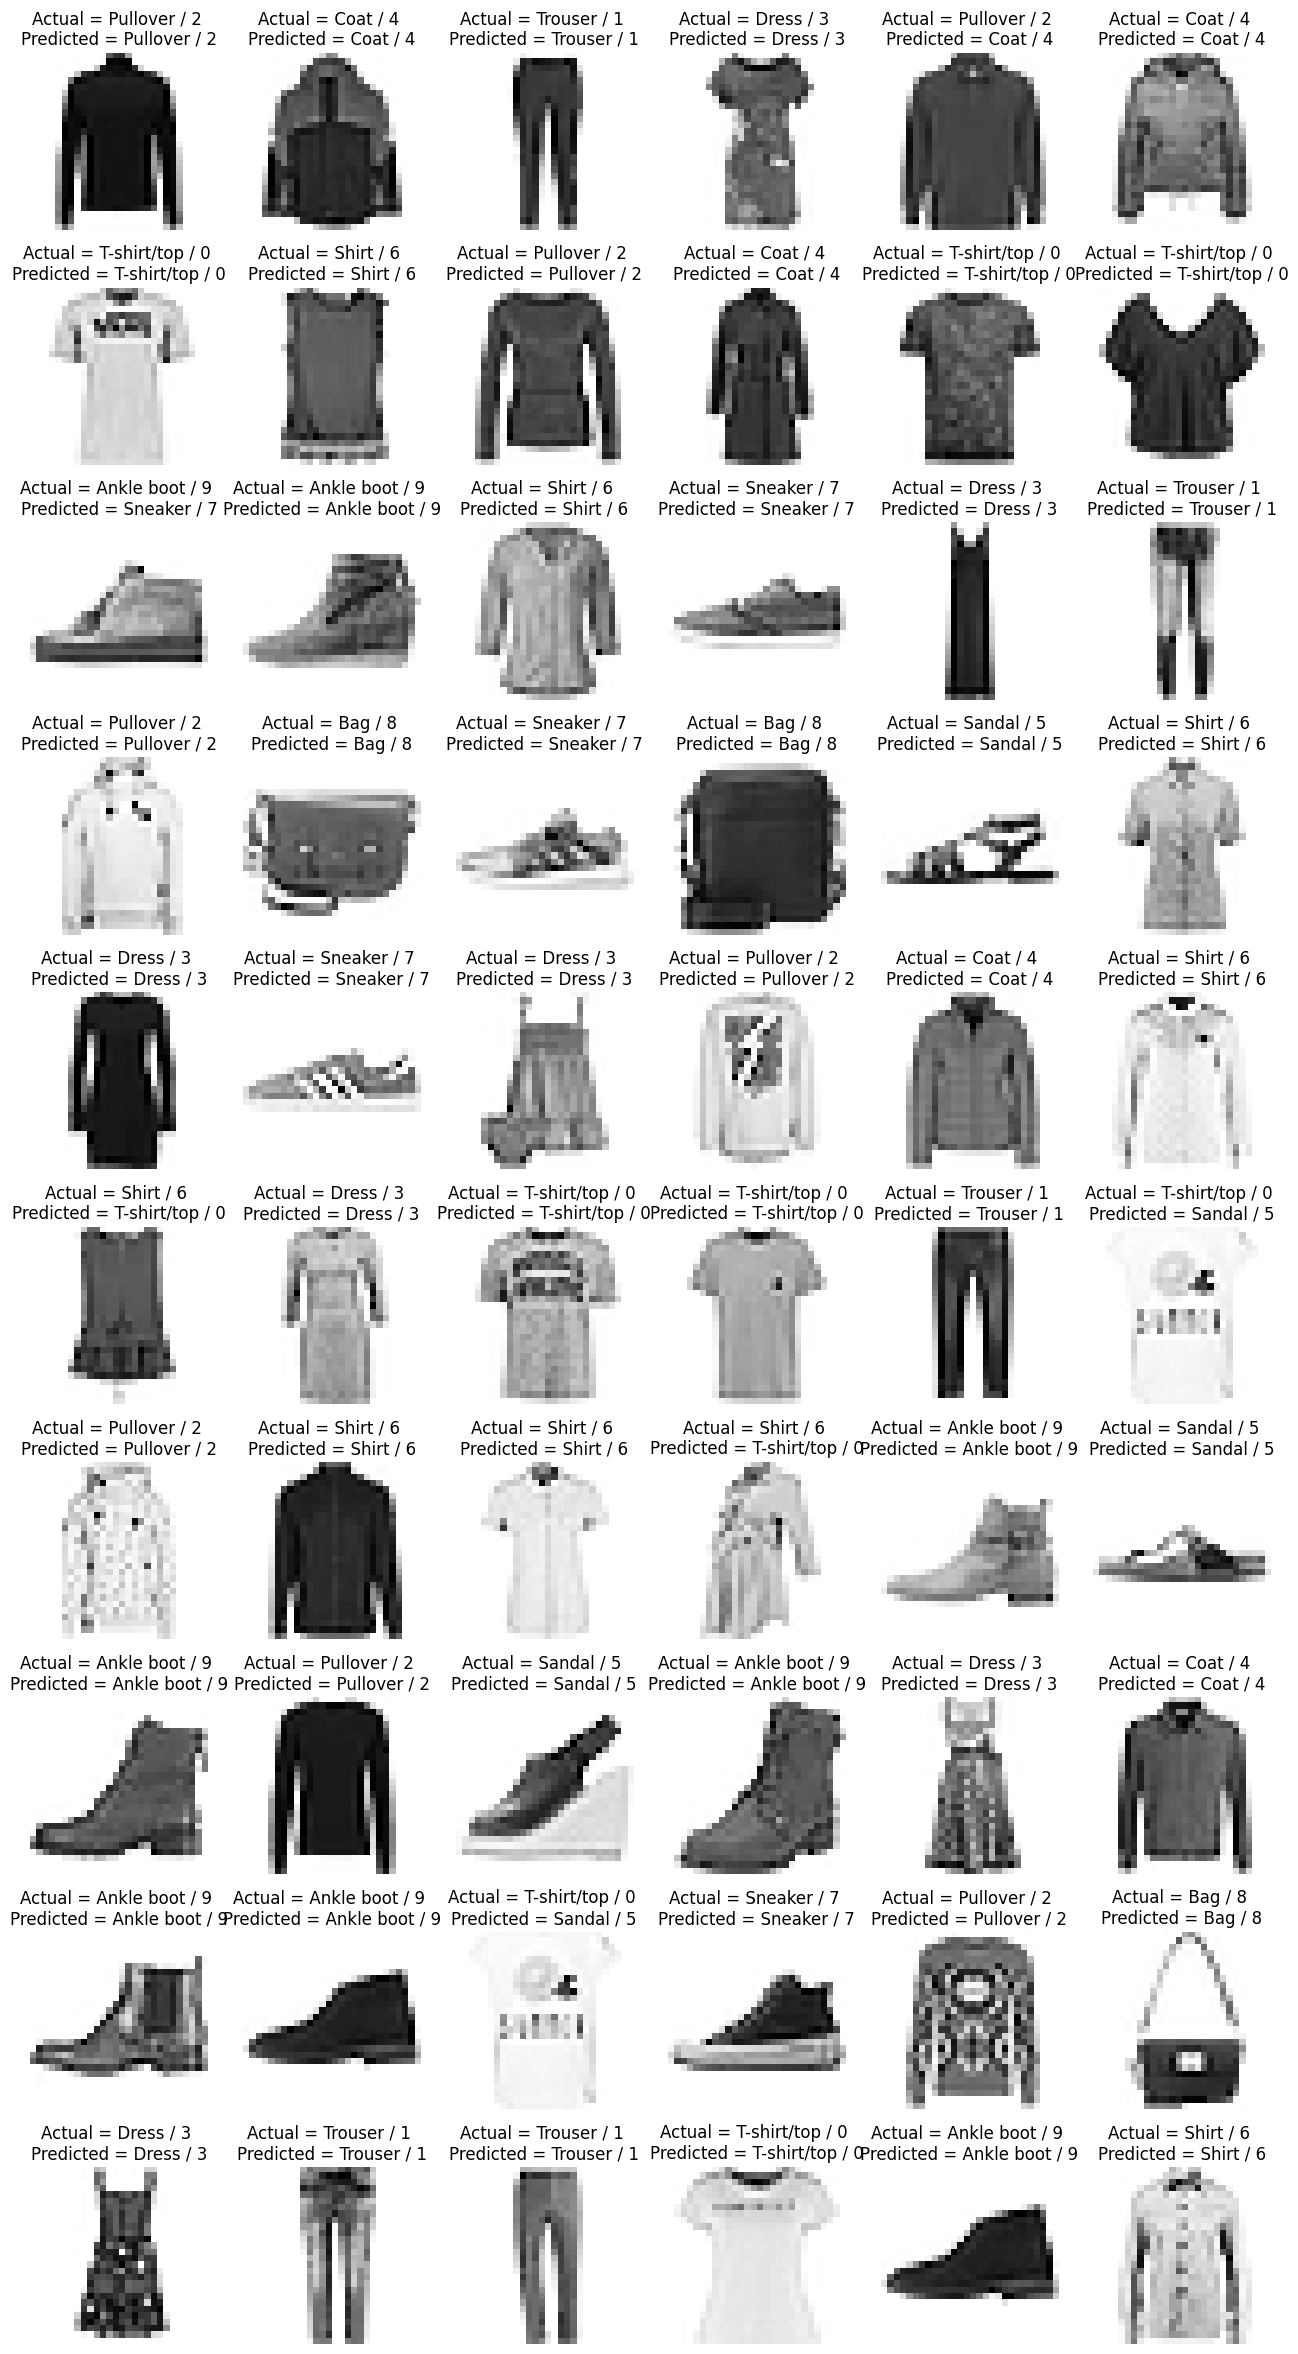

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

"""## Confusion Matrix"""

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.91      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.85      0.84      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.87      0.84      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.68      0.71      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



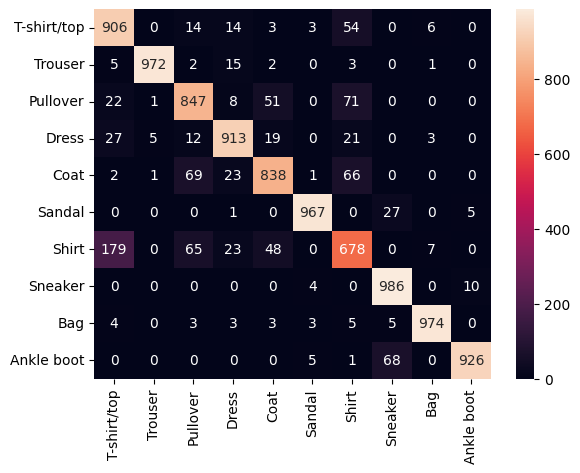

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

"""# Save Model"""

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

# Build 2 complex CNN

#Building CNN model

In [ ]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model

In [ ]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


#Train the Model

In [ ]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 27s 278ms/step - loss: 1.0144 - accuracy: 0.6188 - val_loss: 0.5594 - val_accuracy: 0.7803
Epoch 2/20
94/94 [==============================] - 23s 242ms/step - loss: 0.5502 - accuracy: 0.7931 - val_loss: 0.4778 - val_accuracy: 0.8233
Epoch 3/20
94/94 [==============================] - 23s 247ms/step - loss: 0.4633 - accuracy: 0.8289 - val_loss: 0.4016 - val_accuracy: 0.8516
Epoch 4/20
94/94 [==============================] - 20s 213ms/step - loss: 0.4063 - accuracy: 0.8514 - val_loss: 0.3643 - val_accuracy: 0.8658
Epoch 5/20
94/94 [==============================] - 24s 253ms/step - loss: 0.3704 - accuracy: 0.8655 - val_loss: 0.3434 - val_accuracy: 0.8749
Epoch 6/20
94/94 [==============================] - 23s 247ms/step - loss: 0.3363 - accuracy: 0.8764 - val_loss: 0.3180 - val_accuracy: 0.8836
Epoch 7/20
94/94 [==============================] - 20s 211ms/step - loss: 0.3168 - accuracy: 0.8848 - val_loss: 0.3246 - val_accuracy: 0.8808

"""######## very complex model"""

#Building CNN model

In [ ]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model

In [ ]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model

In [ ]:
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 48s 490ms/step - loss: 1.2223 - accuracy: 0.5235 - val_loss: 0.6761 - val_accuracy: 0.7416
Epoch 2/50
94/94 [==============================] - 42s 447ms/step - loss: 0.6178 - accuracy: 0.7610 - val_loss: 0.5091 - val_accuracy: 0.8001
Epoch 3/50
94/94 [==============================] - 43s 457ms/step - loss: 0.4978 - accuracy: 0.8093 - val_loss: 0.4616 - val_accuracy: 0.8252
Epoch 4/50
94/94 [==============================] - 42s 451ms/step - loss: 0.4307 - accuracy: 0.8408 - val_loss: 0.3764 - val_accuracy: 0.8598
Epoch 5/50
94/94 [==============================] - 46s 489ms/step - loss: 0.3714 - accuracy: 0.8696 - val_loss: 0.3413 - val_accuracy: 0.8769
Epoch 6/50
94/94 [==============================] - 43s 458ms/step - loss: 0.3338 - accuracy: 0.8830 - val_loss: 0.3188 - val_accuracy: 0.8842
Epoch 7/50
94/94 [==============================] - 42s 448ms/step - loss: 0.3041 - accuracy: 0.8924 - val_loss: 0.3142 - val_accuracy: 0.8895

[0.47799140214920044, 0.9010999798774719]